# Example notebook: data observation and plotting
This example notebook uses both the `features.tsv` and `participants.tsv` files in the `sample` data directory.

In [1]:
# Imports.
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Location of 'sample' data directory.
DATA_DIR=os.path.join('..', 'sample')

In [3]:
# Load as dataframes, and join features/participants files on pid field.
ppt_df = pd.read_csv(os.path.join(DATA_DIR, 'participants.tsv'), delimiter='\t')
feat_df = pd.read_csv(os.path.join(DATA_DIR, 'features.tsv'), delimiter='\t')
comb_df = ppt_df.merge(feat_df, how='left', left_on='pid', right_on='pid')

# View combined dataframe.
comb_df

,pid,n_meas_inlab,n_meas_ambulatory,aurora_size,fitzpatrick_scale,bp_cuff_arm,in_feature_table,age,height,weight,...,delta_dicrotic_notch_height_pressure,delta_dpdt_pressure,delta_ejection_duration_fraction_pressure,delta_ejection_duration_pressure,delta_hr_pressure,delta_quality_pressure,delta_rwat_pressure,delta_sysrise_pressure,delta_invpat_pressure,delta_rpat_pressure
0,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
1,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,-0.142595,-0.646054,0.034060,-0.0325,18.043242,0.166928,-0.035,-0.0350,-0.339737,0.00925
2,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
3,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
4,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,a005,11,NaN,M,1.0,L,1,49.0,66.0,142.0,...,0.093355,-0.938597,0.016637,-0.0025,3.002960,0.000000,0.010,0.0675,-0.813435,0.01925
383,a005,11,NaN,M,1.0,L,1,49.0,66.0,142.0,...,0.007684,-3.519975,-0.005762,-0.0175,2.754045,0.000000,0.010,-0.0425,-0.500740,0.01125
384,a005,11,NaN,M,1.0,L,1,49.0,66.0,142.0,...,-0.069275,-4.135001,0.011637,-0.0125,4.640690,0.000000,0.010,0.0125,-0.459383,0.01025
385,a005,11,NaN,M,1.0,L,1,49.0,66.0,142.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.00000


Text(0.5, 0, 'Age (years)')

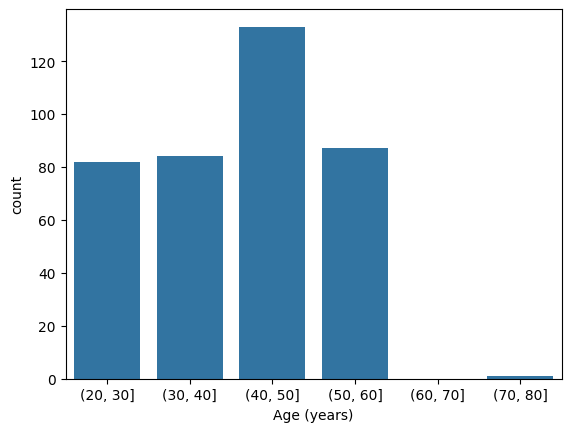

In [4]:
# Bin age into 10-year intervals, and plot discretized histogram.
comb_df['age_bin'] = pd.cut(comb_df['age'], bins=[20, 30, 40, 50, 60, 70, 80])
sns.countplot(x='age_bin', data=comb_df)
plt.xlabel('Age (years)')

Text(0, 0.5, 'Resting SBP (mmHg)')

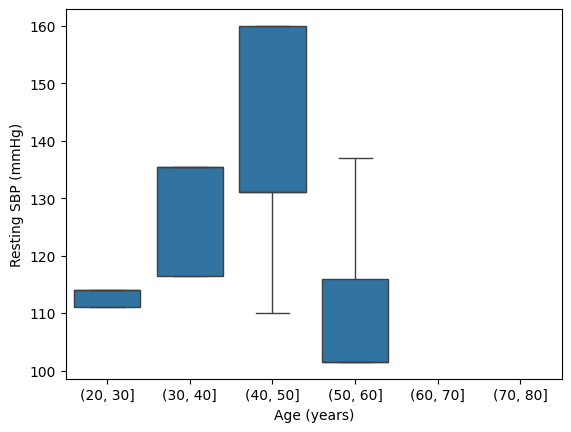

In [5]:
# Plot resting SBP vs. age bin.
sns.boxplot(x='age_bin', y='baseline_sbp', data=comb_df)
plt.xlabel('Age (years)')
plt.ylabel('Resting SBP (mmHg)')

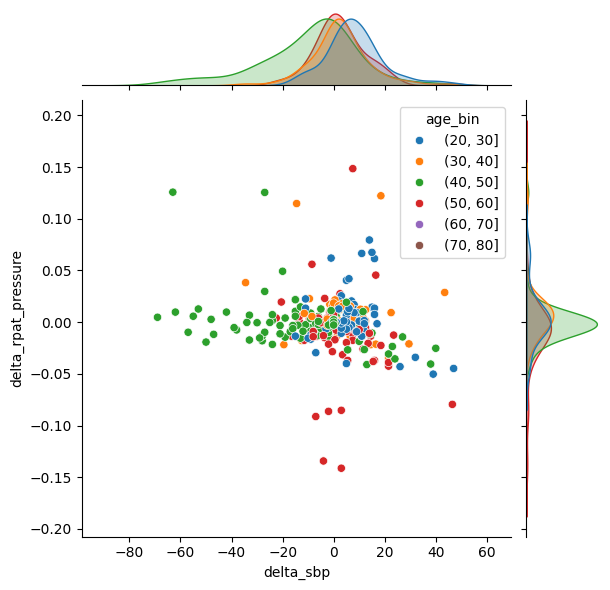

In [6]:
# Change in rPAT vs. change in SBP stratified by age. 
sns.jointplot(x='delta_sbp', y='delta_rpat_pressure', hue='age_bin', data=comb_df)